# Predicting Health Insurance Coverage: A Data Science Approach

Health insurance is a critical aspect of individual financial and physical well-being, especially in the United States, where healthcare costs are significant. 

This project aims to develop a predictive model to identify customers who don't have health insurance. The notebook follows a comprehensive and typical data science process.

---

## Data Understanding

To begin the data science process, we explored the dataset to gain insights into its structure, quality, and potential relationships between variables. This step is crucial for identifying any issues or patterns that could influence model performance.

### Importing Libraries

In [48]:
# Standard library 
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

# Scikit-learn 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score, make_scorer, recall_score, roc_auc_score)
from sklearn.model_selection import (cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, StratifiedKFold, train_test_split)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
from sklearn.neural_network import MLPClassifier

# Imbalanced-learn 
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.pipeline import Pipeline

# XGBoost 
from xgboost import XGBClassifier

# Define a custom color palette
custom_palette = ['#63783D', '#CFE0BC']

# Set the custom color palette for seaborn plots
sns.set_palette(custom_palette)

### Loading the Data

In [49]:
df = pd.read_csv('../data/customer.csv')

df.head()

,Unnamed: 0,custid,sex,is_employed,income,marital_status,health_ins,housing_type,num_vehicles,age,state_of_res,code_column,gas_usage,rooms,recent_move_b
0,7,000006646_03,Male,True,22000.0,Never married,True,Homeowner free and clear,0.0,24,Alabama,1047,210.0,3,F
1,8,000007827_01,Female,NaN,23200.0,Divorced/Separated,True,Rented,0.0,82,Alabama,1047,3.0,6,T
2,9,000008359_04,Female,True,21000.0,Never married,True,Homeowner with mortgage/loan,2.0,31,Alabama,1047,40.0,3,F
3,10,000008529_01,Female,NaN,37770.0,Widowed,True,Homeowner free and clear,1.0,93,Alabama,1047,120.0,2,F
4,11,000008744_02,Male,True,39000.0,Divorced/Separated,True,Rented,2.0,67,Alabama,1047,3.0,2,F


### Data Overview

In [50]:
df.shape

(72458, 15)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72458 entries, 0 to 72457
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      72458 non-null  int64  
 1   custid          72458 non-null  object 
 2   sex             72458 non-null  object 
 3   is_employed     46943 non-null  object 
 4   income          72458 non-null  float64
 5   marital_status  72458 non-null  object 
 6   health_ins      72458 non-null  bool   
 7   housing_type    70772 non-null  object 
 8   num_vehicles    70772 non-null  float64
 9   age             72458 non-null  int64  
 10  state_of_res    72458 non-null  object 
 11  code_column     72458 non-null  int64  
 12  gas_usage       70772 non-null  float64
 13  rooms           72458 non-null  int64  
 14  recent_move_b   70771 non-null  object 
dtypes: bool(1), float64(3), int64(4), object(7)
memory usage: 7.8+ MB


In [52]:
# Display summary statistics of the DataFrame
df.describe()

,Unnamed: 0,income,num_vehicles,age,code_column,gas_usage,rooms
count,72458.000000,7.245800e+04,70772.000000,72458.000000,72458.000000,70772.000000,72458.000000
mean,49910.637556,4.188143e+04,2.066820,49.208893,3285.523572,41.230501,3.494549
std,28772.082702,5.827460e+04,1.170076,18.090035,2661.775225,63.149323,1.706537
min,7.000000,-6.900000e+03,0.000000,0.000000,131.000000,1.000000,1.000000
25%,24911.250000,1.070000e+04,1.000000,34.000000,1305.000000,3.000000,2.000000
50%,49838.000000,2.640000e+04,2.000000,48.000000,2269.000000,10.000000,3.000000
75%,74786.750000,5.200000e+04,3.000000,62.000000,4979.000000,60.000000,5.000000
max,100000.000000,1.257000e+06,6.000000,120.000000,8962.000000,570.000000,6.000000


In [53]:
# Print the number of null values for each column
print("\nNull values per column:")
print(df.isnull().sum())


Null values per column:
Unnamed: 0            0
custid                0
sex                   0
is_employed       25515
income                0
marital_status        0
health_ins            0
housing_type       1686
num_vehicles       1686
age                   0
state_of_res          0
code_column           0
gas_usage          1686
rooms                 0
recent_move_b      1687
dtype: int64


In [54]:
# Print the number of duplicate rows
print("\nDuplicate rows:")
print(df.duplicated().sum())


Duplicate rows:
0


In [55]:
# Print the number of unique values for each column
print("\nUnique values per column:")
print(df.nunique())


Unique values per column:
Unnamed: 0        72458
custid            72458
sex                   2
is_employed           2
income             4445
marital_status        4
health_ins            2
housing_type          4
num_vehicles          7
age                  81
state_of_res         51
code_column          49
gas_usage            57
rooms                 6
recent_move_b         2
dtype: int64


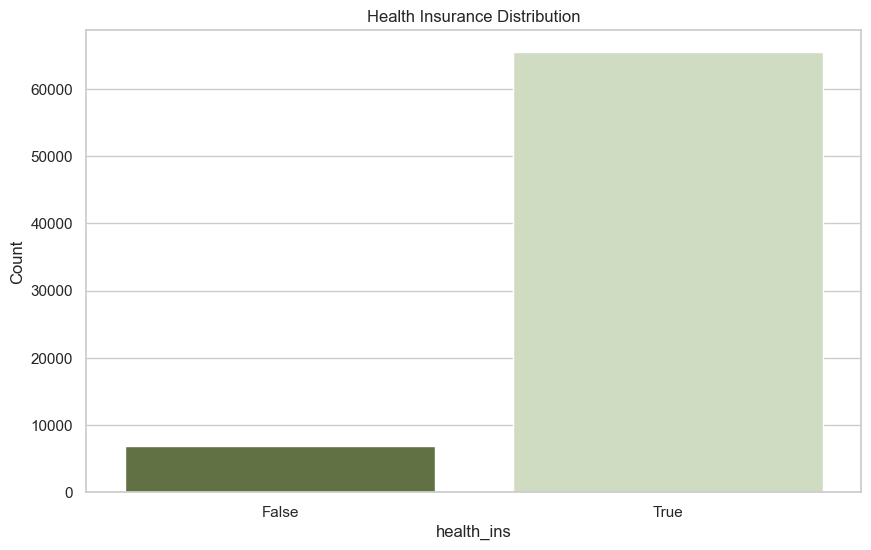

In [56]:
# Health Insurance Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='health_ins', data=df, hue='health_ins', palette=custom_palette, legend=False)
plt.title('Health Insurance Distribution')
plt.xlabel('health_ins')
plt.ylabel('Count')
plt.show()

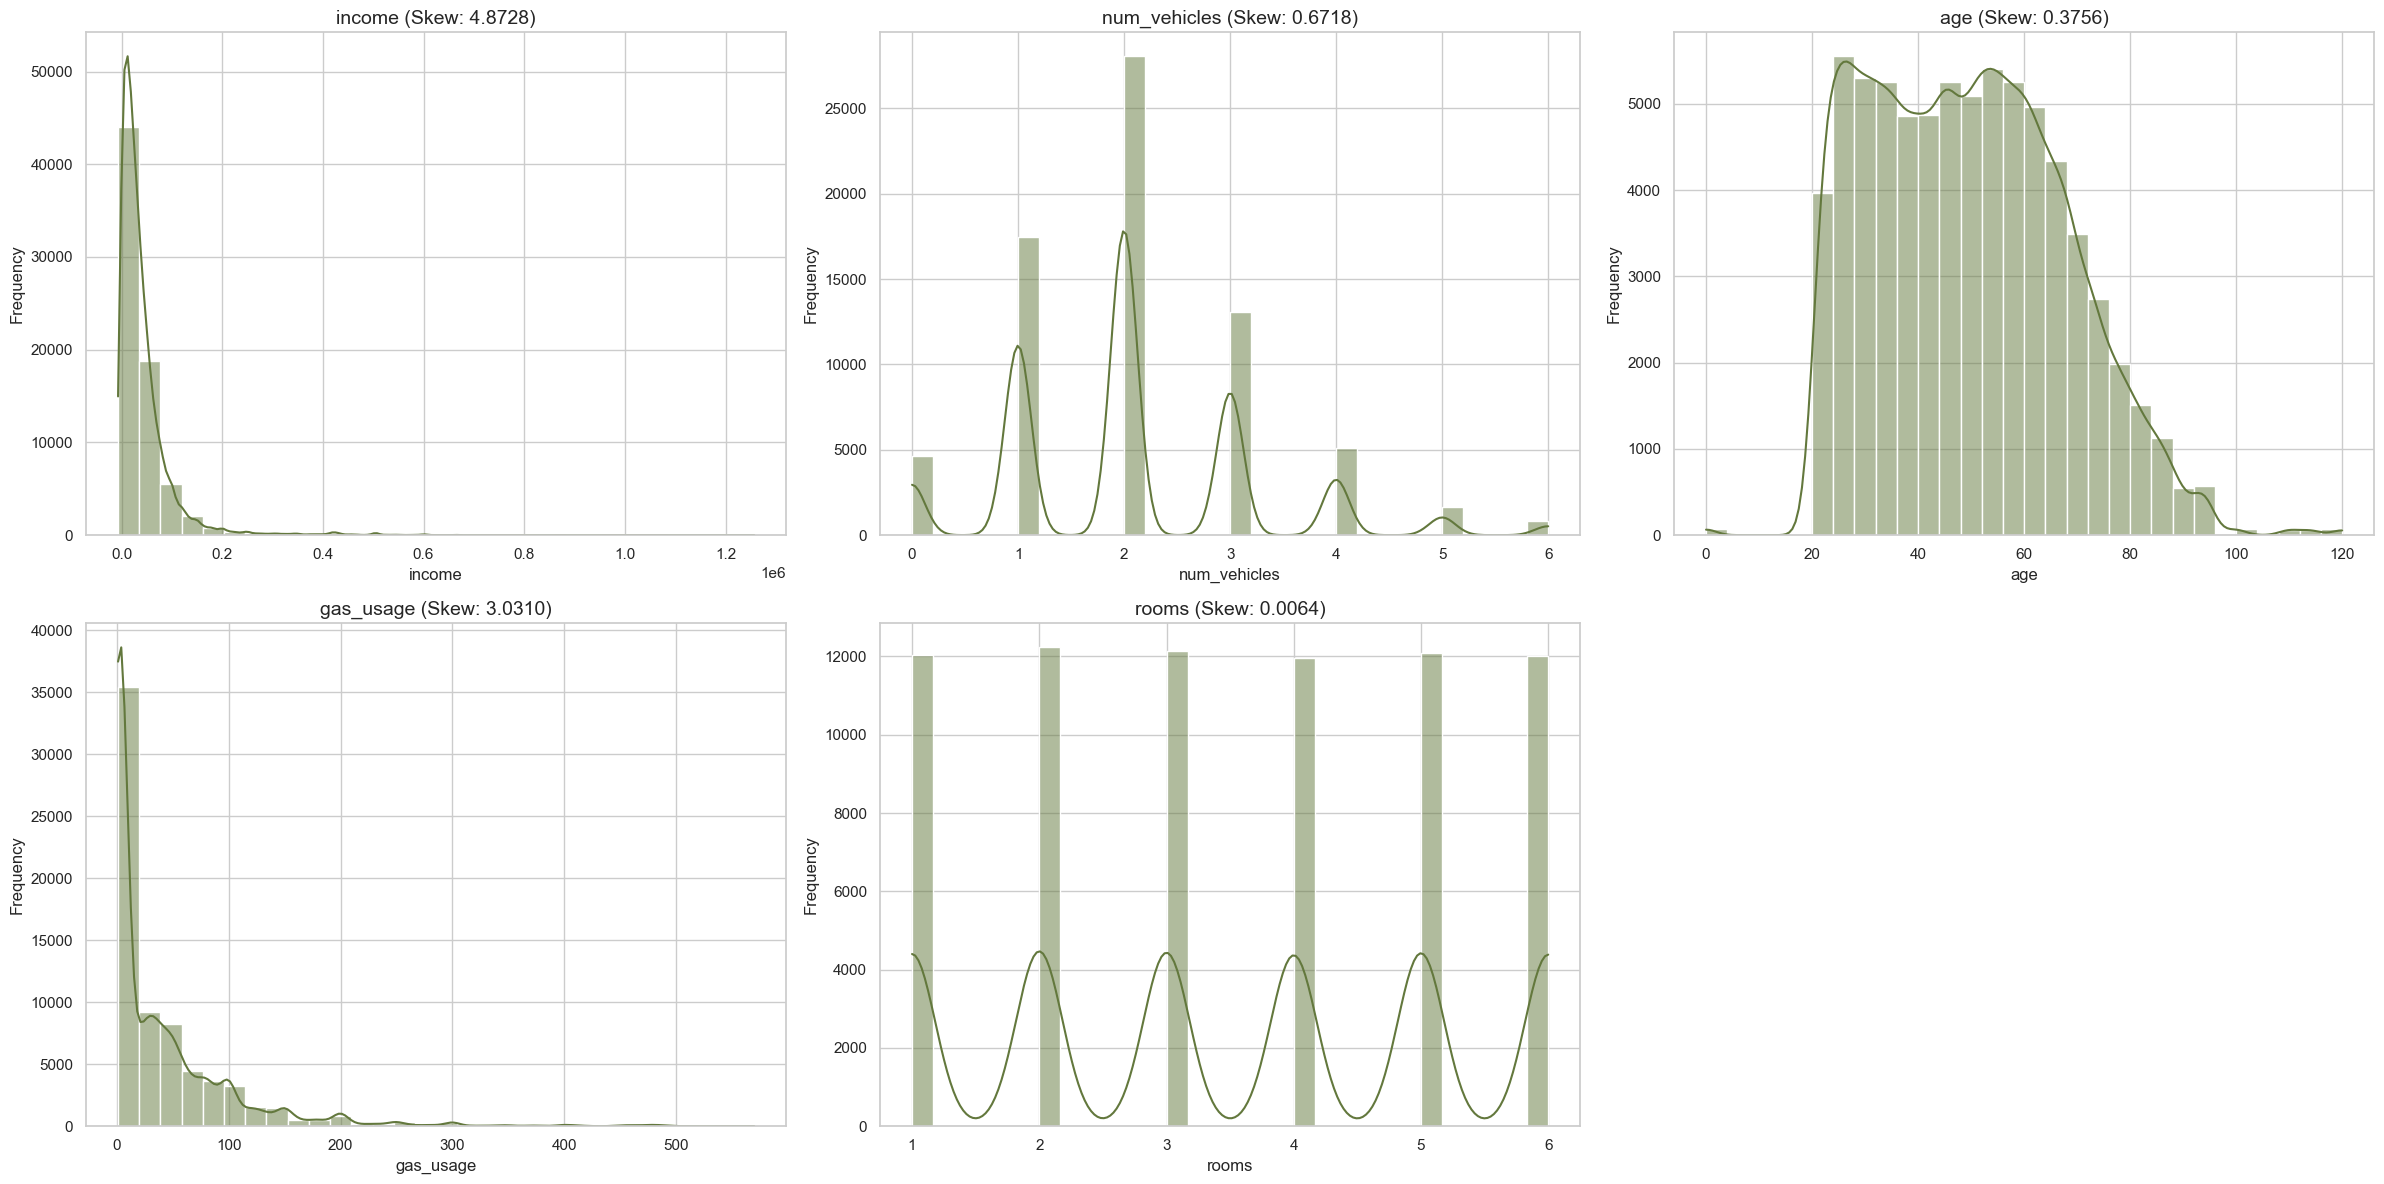

In [57]:
# List of numerical features to plot
numerical_features = ['income', 'num_vehicles', 'age', 'gas_usage', 'rooms']

color = custom_palette[0]

f, axes = plt.subplots(2, 3, figsize=(24, 12)) 
axes = axes.flatten()  

# Iterate over the numerical features and create a histogram for each
for i, col in enumerate(df[numerical_features].columns):
    sns.histplot(df[col], kde=True, ax=axes[i], bins=30, color=color)  
    axes[i].set_title(f'{col} (Skew: {df[col].skew():.4f})', fontsize=14)  
    axes[i].set_xlabel(col, fontsize=12)  
    axes[i].set_ylabel('Frequency', fontsize=12)  

for j in range(len(numerical_features), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()

plt.show()

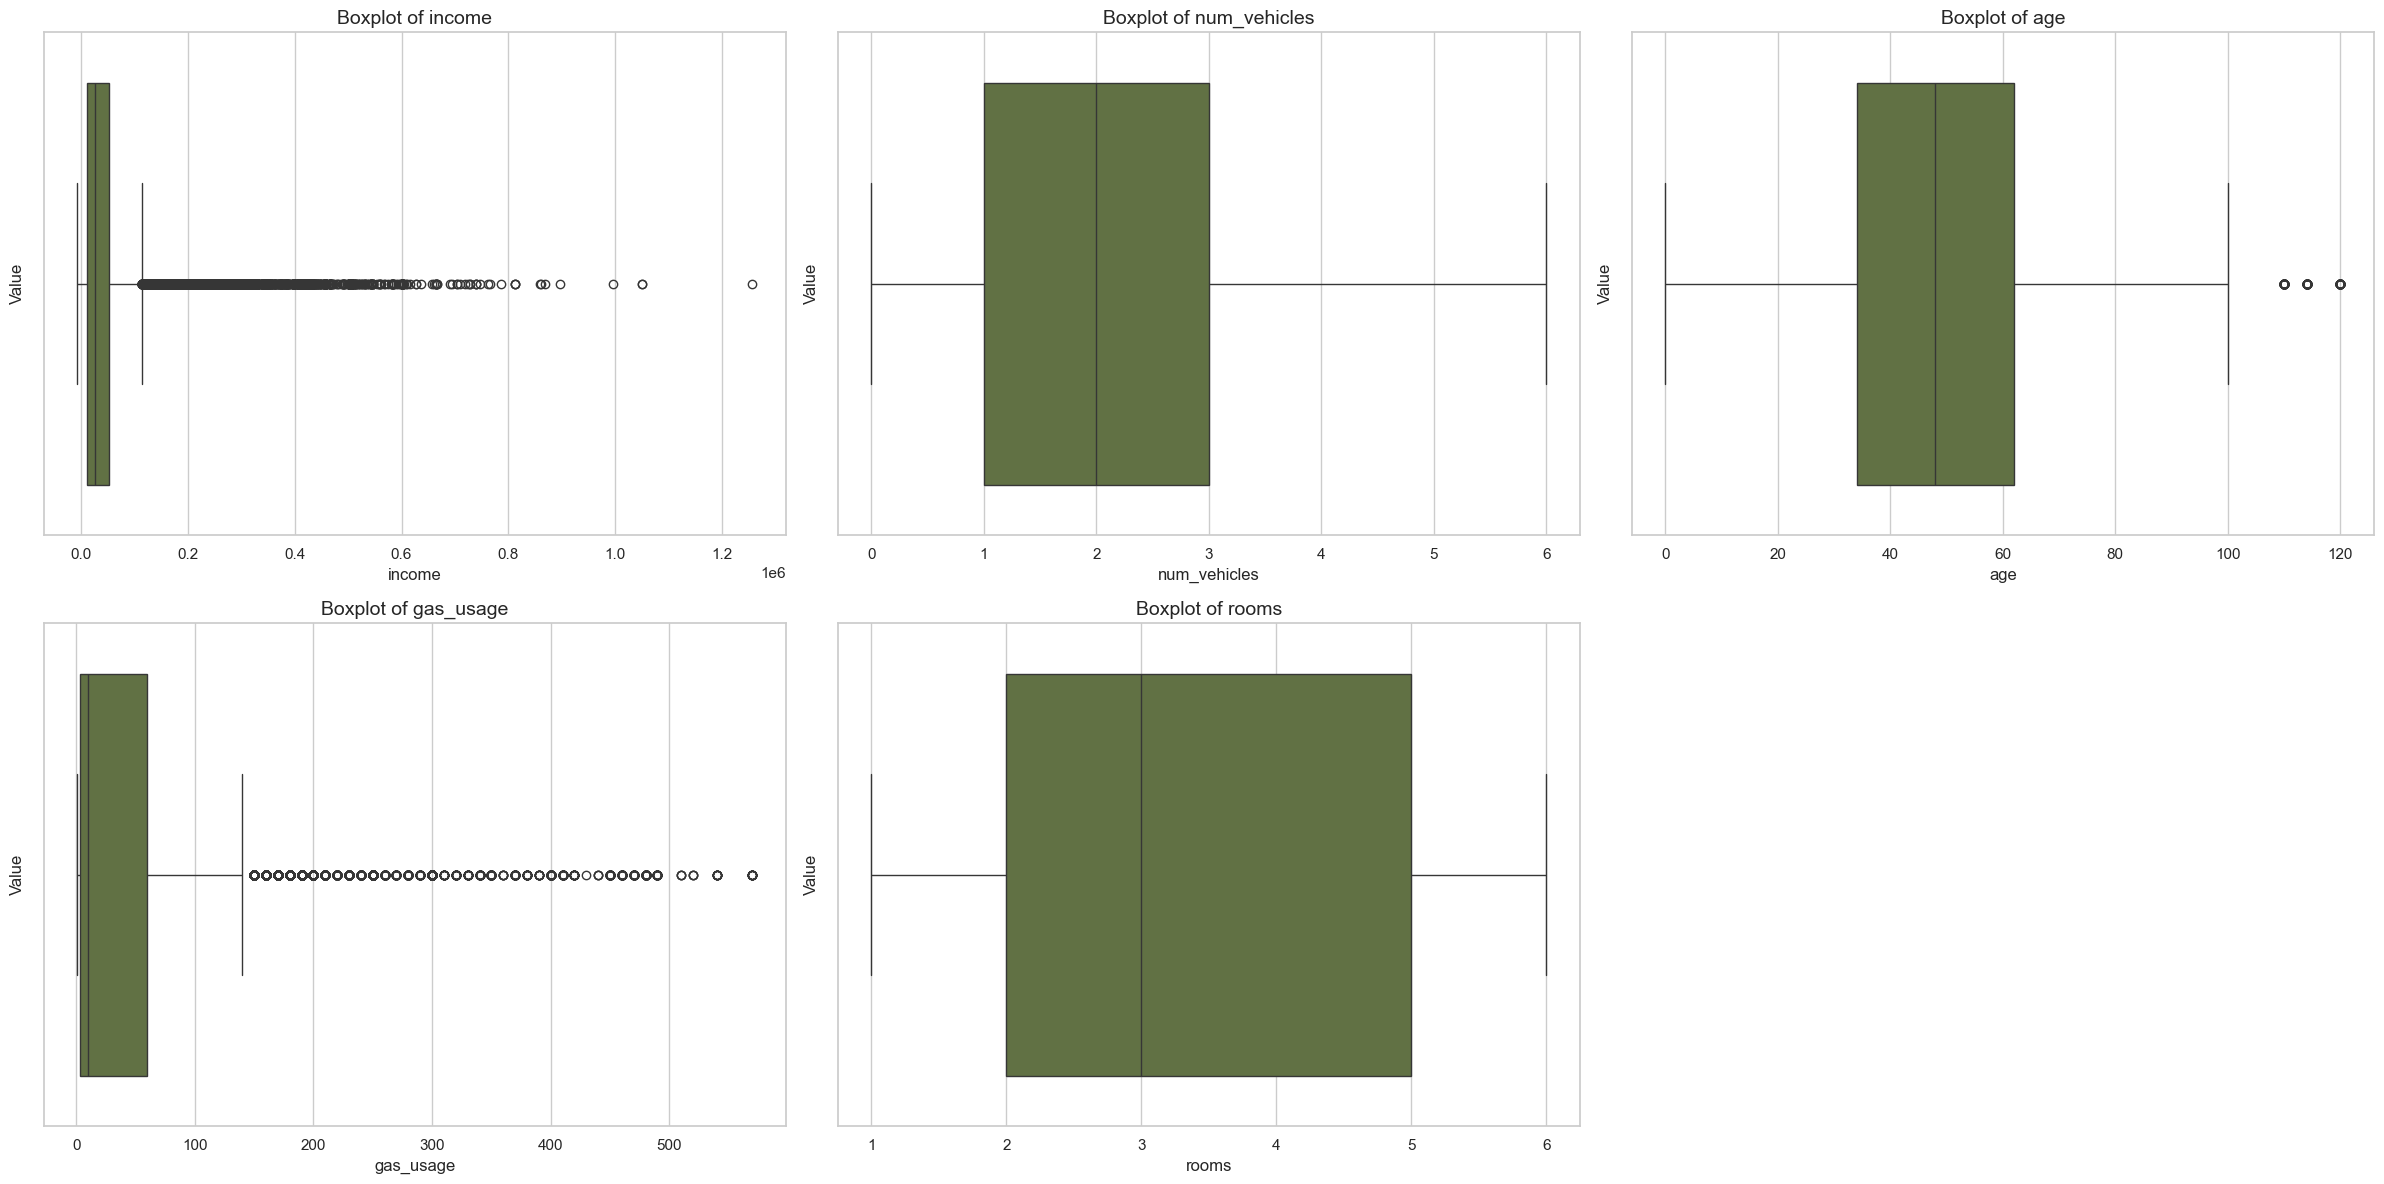

In [58]:
sns.set_theme(style="whitegrid")

f, axes = plt.subplots(2, 3, figsize=(24, 12))  
axes = axes.flatten()

# Iterate over the numerical features and create a boxplot for each
for i, feature in enumerate(numerical_features):
    sns.boxplot(x=df[feature], ax=axes[i], color=color)
    axes[i].set_title(f'Boxplot of {feature}', fontsize=14)
    axes[i].set_xlabel(feature, fontsize=12)
    axes[i].set_ylabel('Value', fontsize=12)

for j in range(len(numerical_features), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

### Key Insights from Data Understanding

1. The dataset has a reasonable number of observations (72458) and 15 features.
2. The target variable is `health_ins`.
3. The dataset contains a mix of numerical and categorical features. We might need to encode the categorical features before building the model.
4. There are some missing values in the dataset. 
5. There are no duplicate rows in the dataset.
6. There are some outliers in the dataset, especially in the `income` and `gas_usage` columns, but also in `age`. We can observe this by looking at the distribution plots and the box plots. 
7. The dataset is imbalanced, with more people having health insurance than not having it. We need to consider this while building the model.

---

## Data Preparation